# Visualizing Data with Seaborn

"A picture is worth a thousand words."

An important element of data analysis and data presentation consists of making data visualizations. With [Seaborn](https://seaborn.pydata.org/), you can easily make simple, clear, and beautiful graphs. The only thing you need to do, is to present the data to Seaborn in a way it accepts. We will make different types of visualizations with data we extract from ancient texts.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from tf.app import use
A = use('etcbc/bhsa', hoist=globals())

This is Text-Fabric 9.4.1
Api reference : https://annotation.github.io/text-fabric/tf/cheatsheet.html

122 features found and 0 ignored


## Stripchart

Have a look at the documentation of the [stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html) and other visualizations of [categorical data](https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial).

If you want to make a vizualization using a function from some package, it is important to get an idea of the structure of the data that the function needs. For instance, in the [documentation of the stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html), a dataset "tips" is loaded. Explore this dataset first!

In [3]:
tips = sns.load_dataset("tips")

In [4]:
type(tips)

pandas.core.frame.DataFrame

In [5]:
tips.shape

(244, 7)

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Then you see immediately, that the arguments x and y in the function sns.stripplot() are the names of two columns: "day" is a categorical variable, and "total_bill" is a numeric variable.

In [7]:
# You can vary the looks of the plot with set():

sns.set(style="whitegrid",
         rc = {'figure.figsize':(12,8)})

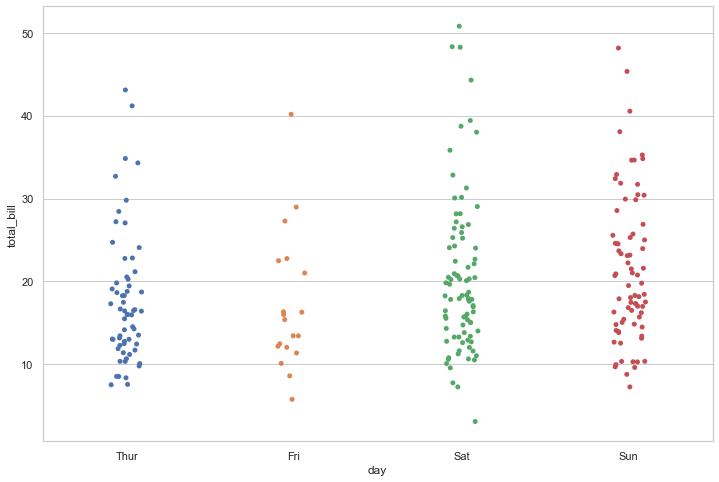

In [8]:
ax = sns.stripplot(x="day", y="total_bill", data=tips)

Could we also use plain lists? Sure!

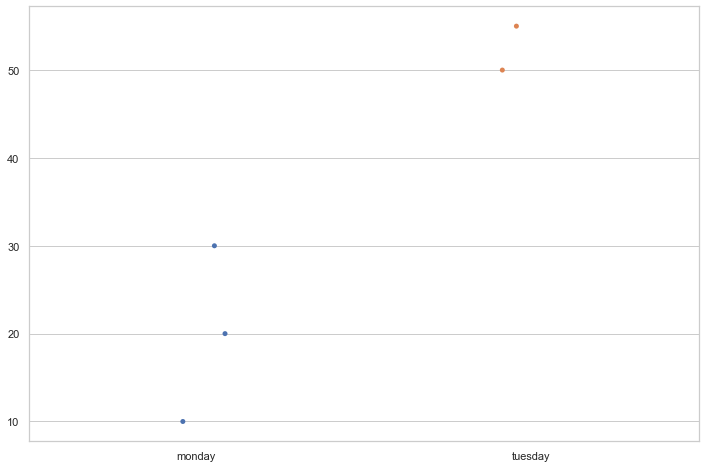

In [9]:
day = ['monday', 'monday', 'monday', 'tuesday', 'tuesday']
bill = [10, 20, 30, 50, 55]

ax = sns.stripplot(x=day, y=bill)

### Hebrew data: use downloaded file from text-fabric browser.

I ran the query `word lex=MLKWT/|MMLKH/ lex_utf8*` in tf browser, and downloaded the results. 

In the following cell, the resulting file is imported as pandas dataframe.

In [15]:
kingdom_df_from_file = pd.read_csv('resultsx_kingdom.tsv', sep='\t', encoding='utf16')

In [16]:
kingdom_df_from_file.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lex1,lex_utf81
0,1,Numbers,24,7,85319,word,מַלְכֻתֹֽו׃,MLKWT/,מלכות
1,2,Deuteronomy,3,21,94994,word,מַּמְלָכֹ֔ות,MMLKH/,ממלכה
2,3,Deuteronomy,28,25,108589,word,מַמְלְכֹ֥ות,MMLKH/,ממלכה
3,4,Joshua,10,2,118404,word,מַּמְלָכָ֑ה,MMLKH/,ממלכה
4,5,Joshua,11,10,119677,word,מַּמְלָכֹ֥ות,MMLKH/,ממלכה


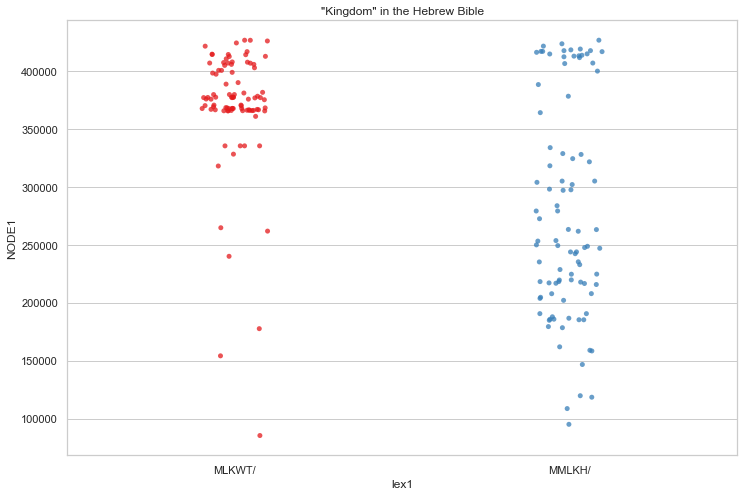

In [17]:
ax = sns.stripplot(y="NODE1", 
                   x="lex1", 
                   data=kingdom_df_from_file, 
                   palette="Set1", 
                   alpha=.75, 
                   size=5
                   ).set(title='"Kingdom" in the Hebrew Bible')

In the figure above, you see that we used the transcription "lex1" for the argument x. We can also use the column "lex_utf81".

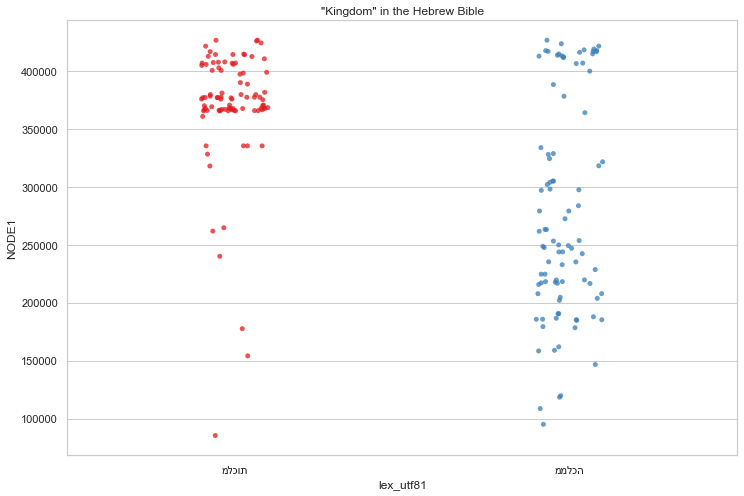

In [18]:
ax = sns.stripplot(y="NODE1", 
                   x="lex_utf81", 
                   data=kingdom_df_from_file, 
                   palette="Set1", 
                   alpha=.75, 
                   size=5
                   ).set(title='"Kingdom" in the Hebrew Bible')

You see that Seaborn reverses the Hebrew text. One possible solution is that we reverse the text in the column "lex_utf8", which Seaborn will reverse back in the right order. We do this using a slice which reverses the string.

In [19]:
kingdom_df_from_file['lex_utf81'] = kingdom_df_from_file['lex_utf81'].str[::-1]

In [20]:
kingdom_df_from_file.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lex1,lex_utf81
0,1,Numbers,24,7,85319,word,מַלְכֻתֹֽו׃,MLKWT/,תוכלמ
1,2,Deuteronomy,3,21,94994,word,מַּמְלָכֹ֔ות,MMLKH/,הכלממ
2,3,Deuteronomy,28,25,108589,word,מַמְלְכֹ֥ות,MMLKH/,הכלממ
3,4,Joshua,10,2,118404,word,מַּמְלָכָ֑ה,MMLKH/,הכלממ
4,5,Joshua,11,10,119677,word,מַּמְלָכֹ֥ות,MMLKH/,הכלממ


Below the x-axis, you see "lex_utf8", which does not much to the understanding of the figure. We remove that with `ax.set(xlabel=None)`. If you want, you can do the same on the y-axis. Another possibility is to rename the label.

With plt.savefig() you export the image as a file. You can use the image then in a presentation or publication.

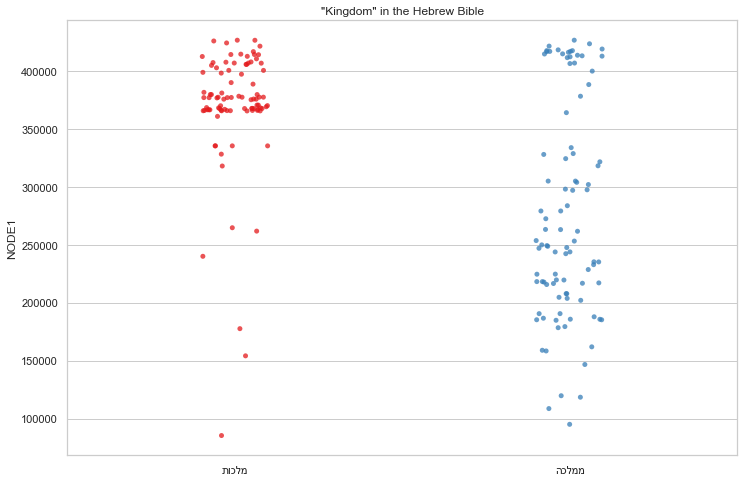

In [21]:
ax = sns.stripplot(y="NODE1", 
                   x="lex_utf81", 
                   data=kingdom_df_from_file, 
                   palette="Set1", 
                   alpha=.75, 
                   size=5
                   )

ax.set(title='"Kingdom" in the Hebrew Bible')
ax.set(xlabel=None)

plt.savefig('kingdom.png')

## Hebrew data: run the query in the notebook.

Now we make such a stripplot using alternative expressions for "kingdom" in Biblical Hebrew.

In [66]:
query = """
word lex=MLKWT/|MMLKH/
"""

In [67]:
results = A.search(query)

  0.23s 184 results


In [68]:
A.table(results)

n,p,word
1,Numbers 24:7,מַלְכֻתֹֽו׃
2,Deuteronomy 3:21,מַּמְלָכֹ֔ות
3,Deuteronomy 28:25,מַמְלְכֹ֥ות
4,Joshua 10:2,מַּמְלָכָ֑ה
5,Joshua 11:10,מַּמְלָכֹ֥ות
6,1_Samuel 10:18,מַּמְלָכֹ֔ות
7,1_Samuel 20:31,מַלְכוּתֶ֑ךָ
8,1_Samuel 27:5,מַּמְלָכָ֖ה
9,1_Samuel 28:17,מַּמְלָכָה֙
10,2_Samuel 3:10,מַּמְלָכָ֖ה


In [69]:
results

[(85319,),
 (94994,),
 (108589,),
 (118404,),
 (119677,),
 (146638,),
 (154104,),
 (158329,),
 (158911,),
 (161877,),
 (177565,),
 (178397,),
 (179354,),
 (184803,),
 (185228,),
 (185251,),
 (185663,),
 (185739,),
 (186576,),
 (187818,),
 (190518,),
 (190533,),
 (202020,),
 (203708,),
 (204644,),
 (207732,),
 (207808,),
 (215673,),
 (216540,),
 (216760,),
 (217066,),
 (217745,),
 (218178,),
 (218180,),
 (219543,),
 (219653,),
 (224568,),
 (224645,),
 (228593,),
 (232815,),
 (235162,),
 (235252,),
 (240021,),
 (242276,),
 (243788,),
 (243825,),
 (246951,),
 (247569,),
 (248656,),
 (249264,),
 (249871,),
 (253161,),
 (253601,),
 (261637,),
 (261770,),
 (263081,),
 (263210,),
 (264675,),
 (272448,),
 (279129,),
 (279133,),
 (283681,),
 (296980,),
 (297422,),
 (297994,),
 (301955,),
 (303877,),
 (304948,),
 (304952,),
 (317956,),
 (318143,),
 (321577,),
 (324317,),
 (327948,),
 (328199,),
 (328692,),
 (333818,),
 (335334,),
 (335349,),
 (335350,),
 (335351,),
 (360804,),
 (364010,),
 (3654

In [70]:
result_nodes = [r[0] for r in results]

In the following cell we retrieve the lexemes in Hebrew script. Note, that with [::-1], we reverse the order of the letters. This is a trick to avoid a reversed order in the plot. Check this!

In [71]:
lexemes = [F.lex_utf8.v(w)[::-1] for w in result_nodes]

In [72]:
kingdom_dict = {'id': result_nodes, 
                'lexeme': lexemes}

kingdom_df = pd.DataFrame(kingdom_dict)
kingdom_df

,id,lexeme
0,85319,תוכלמ
1,94994,הכלממ
2,108589,הכלממ
3,118404,הכלממ
4,119677,הכלממ
...,...,...
179,424177,תוכלמ
180,425872,תוכלמ
181,426495,תוכלמ
182,426546,תוכלמ


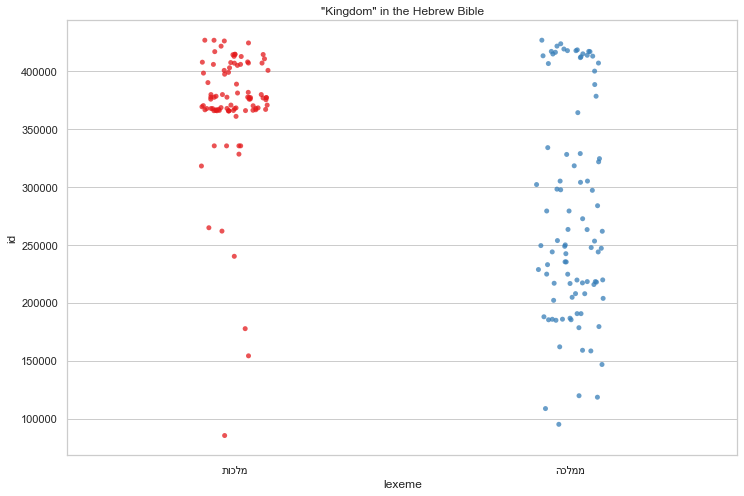

In [73]:
ax = sns.stripplot(y="id", 
                   x="lexeme", 
                   data=kingdom_df, 
                   palette="Set1", 
                   edgecolor="gray", 
                   alpha=.75, 
                   size=5
                   ).set(title='"Kingdom" in the Hebrew Bible')

## Violin plot

The violin plot shows a smoothed probability density. So, we make them with the same goal as the strip plot. 

https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot

[Text(0.5, 1.0, '"Kingdom" in the Hebrew Bible')]

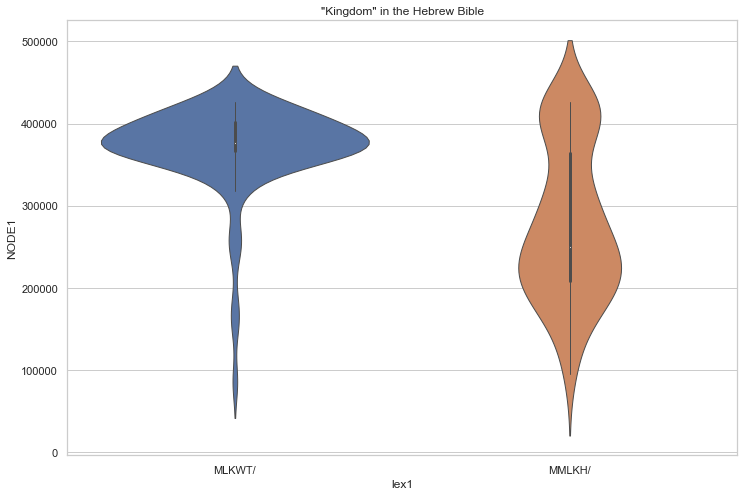

In [74]:
sns.violinplot(y="NODE1", 
               x="lex1", 
               data=kingdom_df_from_file,
               linewidth=1,).set(title='"Kingdom" in the Hebrew Bible')



## Boxplot

https://seaborn.pydata.org/generated/seaborn.boxplot.html


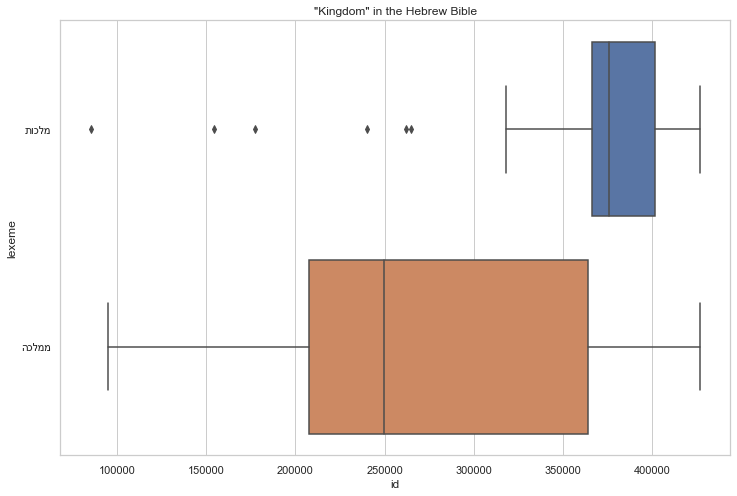

In [75]:
ax = sns.boxplot(x="id", 
                 y="lexeme", 
                 data=kingdom_df
                 ).set(title='"Kingdom" in the Hebrew Bible')

## Barplot

We make a barplot with the lengths of the books of the Hebrew Bible. We measure the length of a book by counting the number of words.

In [76]:
book_names = []
book_lengths = []

for b in F.otype.s('book'):
    book_names.append(F.book.v(b))
    
    word_count = len(L.d(b, 'word'))
    book_lengths.append(word_count)

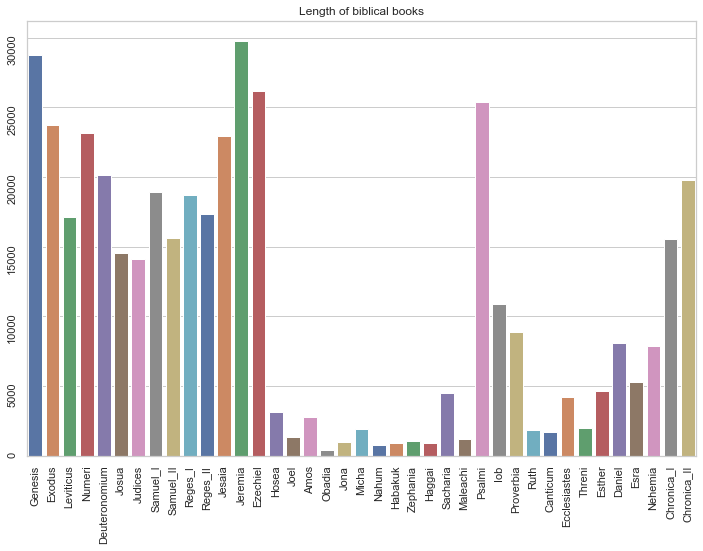

In [77]:
ax = sns.barplot(x=book_names, 
                 y=book_lengths, 
                 palette="deep"
                )

ax.set(title = 'Length of biblical books')
ax.tick_params(labelrotation=90)

plt.savefig('book_lengths.png')

## Heatmap with clustering

Which books have a similar use of parts of speech? We will investigate this by counting and plotting the different parts of speech in ech biblical book.

In [138]:
query = """
book
  word language=Hebrew
"""

In [139]:
results = A.search(query)

  1.09s 420484 results


In [140]:
books = []
pos = []

for result in results:
    bo, wo = result
    books.append(F.book.v(bo))
    pos.append(F.sp.v(wo))

In [141]:
pos_df = pd.DataFrame(zip(books, pos), columns=['book', 'pos'])

In [142]:
pos_counts_df = pos_df.groupby('book')['pos'].value_counts().unstack().fillna(0)

In [143]:
stand_df = pos_counts_df.div(pos_counts_df.sum(axis=1), axis=0)

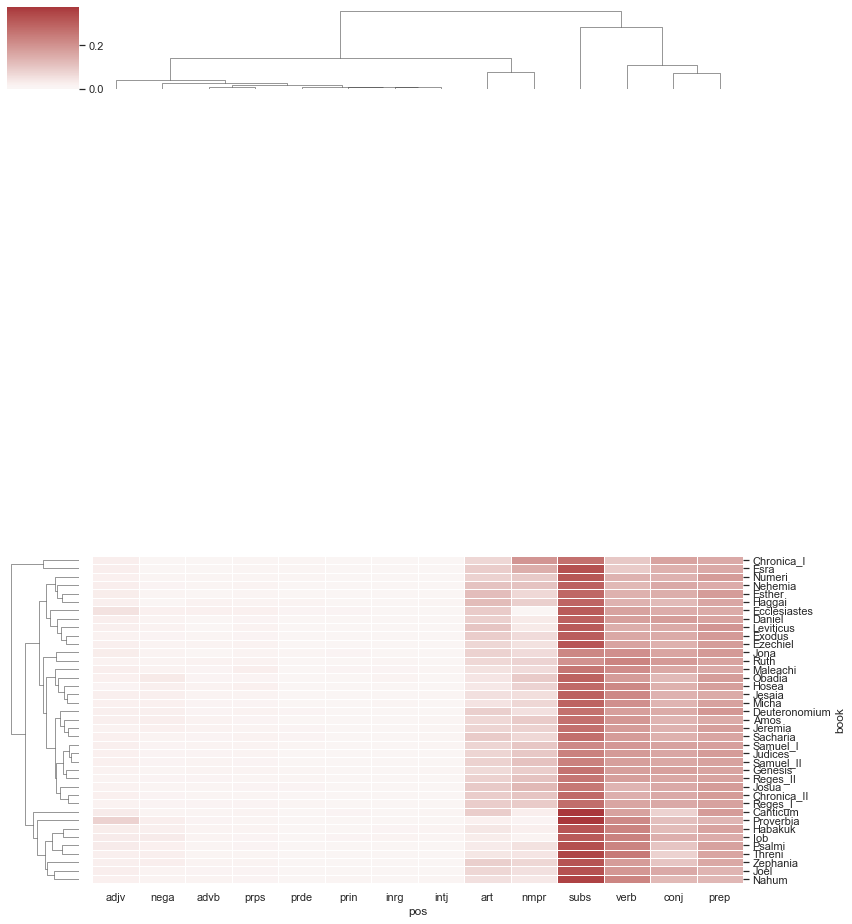

In [144]:
g = sns.clustermap(stand_df, 
                   center=0, 
                   cmap="vlag",
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

## Histogram

With a histogram we are going to visualize the distribution of the length of clauses in the books of Genesis and Psalms. The length of a clause is simply defined as the count of the words in it.

In [65]:
book_names = []
clause_lengths = []

for cl in F.otype.s('clause'):
    bo, ch, ve = T.sectionFromNode(cl)
    if bo in {'Genesis', 'Psalms'}:
        cl_length = len(L.d(cl, 'word'))
        book_names.append(bo)
        clause_lengths.append(cl_length)

In [76]:
cl_len_df = pd.DataFrame(zip(book_names, clause_lengths))
cl_len_df.columns = ['book', 'clause_length']

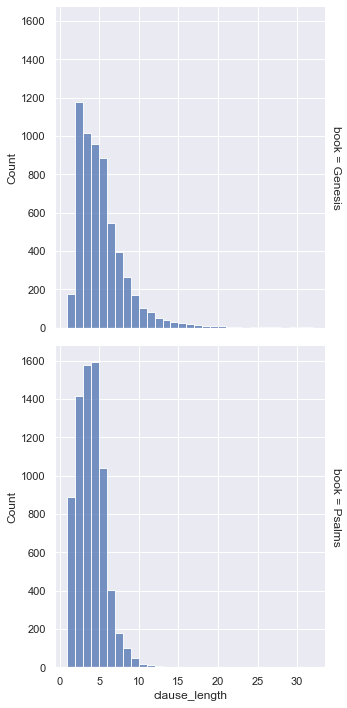

In [86]:
sns.set_theme(style="darkgrid")

ax = sns.displot(cl_len_df,
                 x='clause_length', row='book',
                 binwidth=1, height=5, facet_kws=dict(margin_titles=True),
)

## Scatterplot

We make a scatterplot, which shows us te average clause length of a book against its lexical richness. The lexical richness is defined here as the number of unique lexemes divided by the number of words in a book. The color of the individual dots represents the genre of the book.

The genre of each book is defined manually.

In [51]:
PROSE = ['Genesis', 'Exodus', 'Leviticus', 'Numeri', 'Deuteronomium', 'Josua', 'Judices', 'Samuel_I', 'Samuel_II',
         'Reges_I', 'Reges_II','Jona', 'Ruth', 'Esther', 'Daniel', 'Esra','Nehemia', 'Chronica_I', 'Chronica_II']

POETRY = ['Psalmi', 'Iob', 'Proverbia', 'Canticum','Ecclesiastes', 'Threni']

PROPHECY = ['Jesaia', 'Jeremia', 'Ezechiel', 'Hosea', 'Joel', 'Amos', 'Obadia','Micha', 'Nahum', 'Habakuk', 'Zephania',
            'Haggai', 'Sacharia', 'Maleachi']

In [71]:
book = []
genre = []
lex_richness = []
clause_length = []
book_length = []

for bo in F.otype.s('book'):
    book_name = F.book.v(bo)
    book.append(book_name)
    
    if book_name in PROSE:
        genre.append('prose')
    elif book_name in POETRY:
        genre.append('poetry')
    elif book_name in PROPHECY:
        genre.append('prophecy')
    else:
        raise ValueError('No valid bookname!')
        
    words = L.d(bo, 'word')
    book_length.append(len(words))
    
    unique_lexemes = {F.lex.v(w) for w in words}
    density = len(unique_lexemes) / len(words)
    lex_richness.append(density)
    
    clauses = L.d(bo, 'clause')
    clause_lengths = [len(L.d(cl, 'word')) for cl in clauses]
    av_clause_length = sum(clause_lengths) / len(clause_lengths)
    clause_length.append(av_clause_length)
    
    
    

In [72]:
genres_dict = {'book': book, 
                'genre': genre,
                'lexical_richness': lex_richness,
                'clause_length': clause_length,
                'book_length': book_length}

genres_df = pd.DataFrame(genres_dict)
genres_df

,book,genre,lexical_richness,clause_length,book_length
0,Genesis,prose,0.063134,4.804410,28764
1,Exodus,prose,0.060005,5.489598,23748
2,Leviticus,prose,0.056144,5.558843,17099
3,Numeri,prose,0.062834,5.895754,23188
4,Deuteronomium,prose,0.071989,5.215859,20128
5,Josua,prose,0.080889,6.131701,14526
6,Judices,prose,0.085901,4.944191,14086
7,Samuel_I,prose,0.066353,4.716920,18929
8,Samuel_II,prose,0.083525,4.901727,15612
9,Reges_I,prose,0.069093,5.197497,18685


[Text(0.5, 1.0, 'clause length, lexical richness and genre of biblical books')]

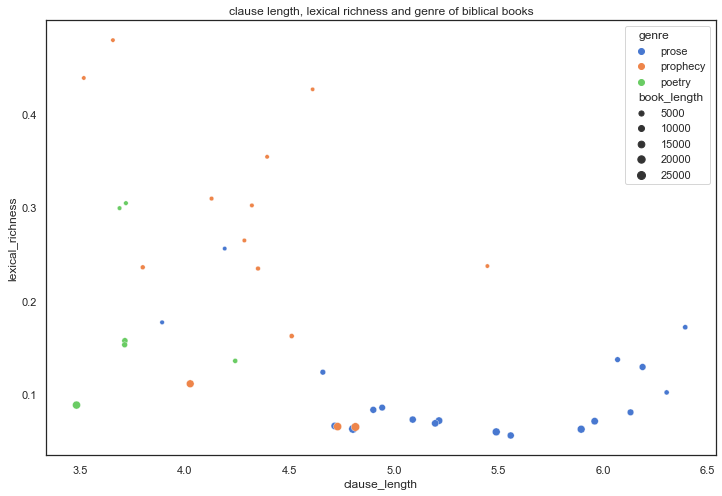

In [74]:
sc = sns.scatterplot(x='clause_length', 
            y='lexical_richness', 
            hue='genre',
            size='book_length',
            palette="muted", 
            data=genres_df)

sc.set(title = 'clause length, lexical richness and genre of biblical books')